In [21]:
import numpy as np
from torch.autograd import Variable
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import torch.utils.data as Data
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
ds =pd.read_csv('/Users/adityakumar/Desktop/Machine Learning/train.csv').values
print(ds.shape)

(42000, 785)


In [23]:
xtrain=ds[2000:10000, 1:].reshape((-1, 1, 28, 28))/255.0
ytrain=ds[2000:10000, 0]

xtest=ds[23000:24500, 1:].reshape((-1, 1, 28, 28))/255.0
ytest=ds[23000:24500, 0]

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(8000, 1, 28, 28) (8000,)
(1500, 1, 28, 28) (1500,)


In [24]:
#in class we had discussed about two methods to opposite of convolution
# explain other one not deconvolution

In [25]:
class CAE(torch.nn.Module):
    def __init__(self):
        super(CAE, self).__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(1, 16, 3, 3, 1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 8, 3, 2, 1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 1)
        )
        self.enc_linear=nn.Linear(32, 2)
        
        self.dec_linear=nn.Linear(2, 32)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, 2), #Hout=(Hin-1)*stride-2*padding+kernel_size+output_padding
            nn.ReLU(True),                   #Wout=(Win-1)*stride-2*padding+kernel_size+output_padding
            nn.ConvTranspose2d(16, 8, 5, 3, 1),  
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, 2, 1),  
            nn.Sigmoid()
        )
    def encode(self, x):
        x=self.encoder(x)
        x=x.view(x.size(0), -1) # why are we using () these brackets instead of []
        x=self.enc_linear(x)
        return x
    
    def decode(self, x):
        x=self.dec_linear(x)
        x=x.view(x.size(0), 8, 2, 2)
        x=self.decoder(x)
        return x
    
    def forward(self, x):
        x=self.encode(x)
        x=self.decode(x)
        return x

In [26]:
model=CAE()

In [27]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)
loss_func=nn.MSELoss()

In [45]:
def batch(train, labels, batch=32):
    start=0
    stop=start+batch
    while start<train.shape[0]:
        yield Variable(torch.FloatTensor(train[start:stop])), Variable(torch.FloatTensor(train[start:stop]))
        start=stop
        stop=start+batch

In [61]:
for epoch in range(200):
    for step,(b_x, b_y) in enumerate(batch(xtrain, ytrain, 32)):
        output=model(b_x)
        loss=loss_func(output, b_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%1000==0 and epoch%20==0:
            out=model(torch.FloatTensor(xtest))
            test_loss=loss_func(out, torch.FloatTensor(xtest))
            loss=test_loss.data.numpy()
            
            print('Epoch: ', epoch, '| Step: ', step, '| Loss: ', loss)

Epoch:  0 | Step:  0 | Loss:  0.0494278
Epoch:  20 | Step:  0 | Loss:  0.048702803


KeyboardInterrupt: 

In [62]:
o = model(torch.FloatTensor(xtrain[:100])).data.numpy()

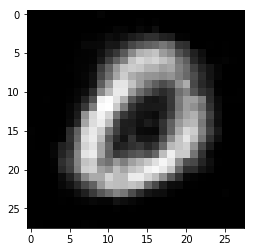

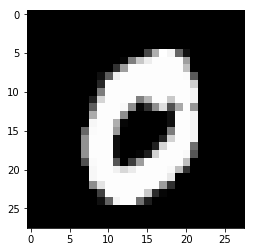

In [63]:
plt.figure(0)
plt.imshow(o[45].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.imshow(xtrain[45].reshape((28, 28)), cmap='gray')

In [64]:
emb = model.encode(torch.FloatTensor(xtrain[:3000])).data.numpy()

In [65]:
print(emb.shape)

(3000, 2)


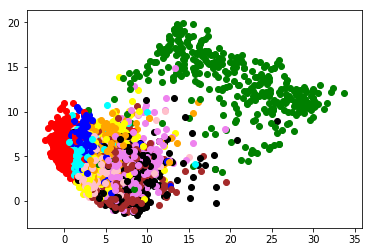

In [66]:
colors = ['red', 'green', 'blue', 'pink', 'brown', 'yellow', 'cyan', 'violet', 'orange', 'black']

for ix in range(emb.shape[0]):
    plt.scatter(emb[ix, 0], emb[ix, 1], color=colors[ytrain[ix]])
plt.show()

In [74]:
rdata = 7*np.random.random((64, 2))
#rdata[:, 1] *= -1

print(rdata.min(0))

dec = model.decode(torch.FloatTensor(rdata)).data.numpy()
print(dec.shape)

[0.16885336 0.09964273]
(64, 1, 28, 28)


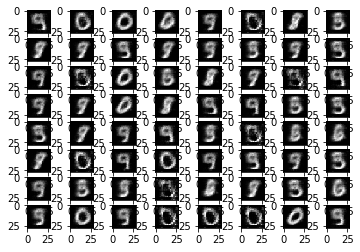

In [75]:
plt.figure(0)

for ix in range(64):
    plt.subplot(8, 8, ix+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(dec[ix].reshape((28, 28)), cmap='gray')
    
plt.show()

In [8]:
nn.MaxPool2d?

In [9]:
torch.nn.ConvTranspose2d?

In [12]:
nn.Conv2d?